In [1]:
import matplotlib.pyplot as plt
import cv2
from skimage.util import random_noise
import numpy as np
import random
from scipy import ndimage


In [2]:
def snp_noise(img):
    org = img.copy()
    row, col = img.shape
    number_of_pixels = 10000
    for _ in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        img[y_coord][x_coord] = 255

    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        img[y_coord][x_coord] = 0

    fig=plt.figure(figsize=(10,10))
    rows = 1
    columns =2

    fig.add_subplot(rows,columns,1)
    plt.imshow(cv2.cvtColor(org, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")

    fig.add_subplot(rows,columns,2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Salt And Pepper Noise Image")

    return img


In [3]:
def gaussian_noise(img):

    gaussian_noise_image = random_noise(img, mode='gaussian', var=0.3)
    gaussian_noise_image = (255*gaussian_noise_image).astype(np.uint8)
    
    fig=plt.figure(figsize=(10,10))
    rows = 1
    columns =2

    fig.add_subplot(rows,columns,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")

    fig.add_subplot(rows,columns,2)
    plt.imshow(cv2.cvtColor(gaussian_noise_image,cv2.COLOR_BGR2RGB))
    plt.title("Gaussian Noise Image")

    return gaussian_noise_image

In [4]:
def is_gray(checkImage):
    if len(checkImage.shape) < 3:
        return True
    if checkImage.shape[2] == 1:
        return True
    b, g, r = checkImage[:, :, 0], checkImage[:, :, 1], checkImage[:, :, 2]
    if (b == g).all() and (b == r).all():
        return True
    return False


In [5]:
def prewitt_edge_detection(image, label):

    var = image
    if is_gray(image) == False:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    Hx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    Hy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    pre_x = ndimage.convolve(image, Hx) / 6.0
    pre_y = ndimage.convolve(image, Hy) / 6.0

    pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))

    pre_out = ((pre_out / np.max(pre_out)) * 255)
    pre_out = pre_out.astype('float32')
    pre_out = pre_out.astype(np.uint8)

    fig = plt.figure(figsize=(10, 10))
    rows = 1
    columns = 2

    fig.add_subplot(rows, columns, 1)
    plt.imshow(cv2.cvtColor(var, cv2.COLOR_BGR2RGB))
    plt.xlabel(label)

    fig.add_subplot(rows, columns, 2)
    plt.imshow(cv2.cvtColor(pre_out, cv2.COLOR_BGR2RGB))
    plt.xlabel("Prewitt Edge detection Image")

    plt.show()


In [6]:
def canny_edge_detection(img, label):

    canny_img = cv2.Canny(img_gry, threshold1=30, threshold2=100)

    fig = plt.figure(figsize=(10, 10))
    rows = 1
    columns = 2

    fig.add_subplot(rows, columns, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.xlabel(label)

    fig.add_subplot(rows, columns, 2)
    plt.imshow(cv2.cvtColor(canny_img, cv2.COLOR_BGR2RGB))
    plt.xlabel("Canny Edge detection Image")
    plt.show()


In [7]:
def laplacian_edge_detection(image, label):

    laplacian = cv2.Laplacian(image, 5, cv2.CV_64F)
    filtered_image = cv2.convertScaleAbs(laplacian)

    # plotting the given image and the laplacian edge detection image
    fig = plt.figure(figsize=(10, 10))
    rows = 1
    columns = 2

    fig.add_subplot(rows, columns, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xlabel(label)

    fig.add_subplot(rows, columns, 2)
    plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
    plt.xlabel("Laplacian Edge detection Image")
    plt.show()


In [8]:
def adaptive_thresholding(img, label):
    th_image = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,13,5)
    fig = plt.figure(figsize=(10, 10))
    rows = 1
    columns = 2

    fig.add_subplot(rows, columns, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.xlabel(label)

    fig.add_subplot(rows, columns, 2)
    plt.imshow(cv2.cvtColor(th_image, cv2.COLOR_BGR2RGB))
    plt.xlabel("Adaptive Thresholding Image")
    plt.show()

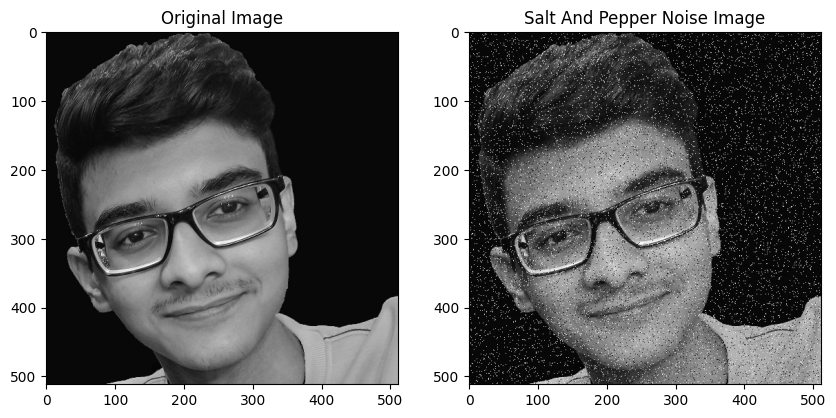

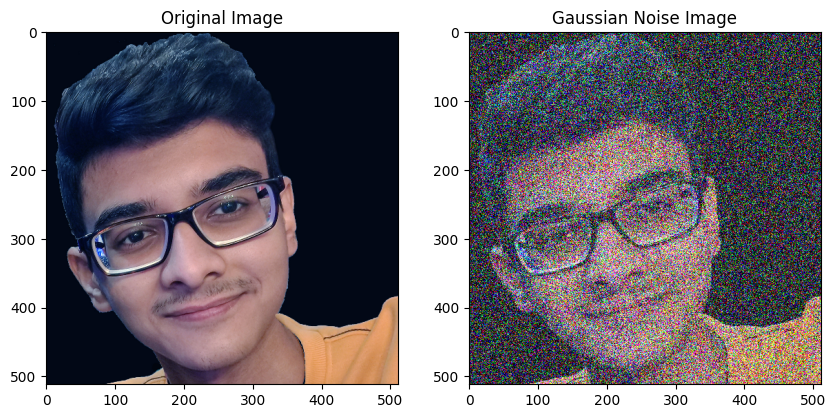

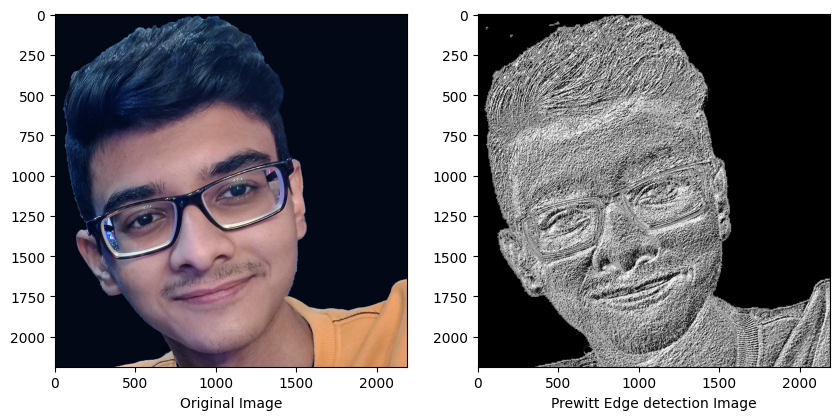

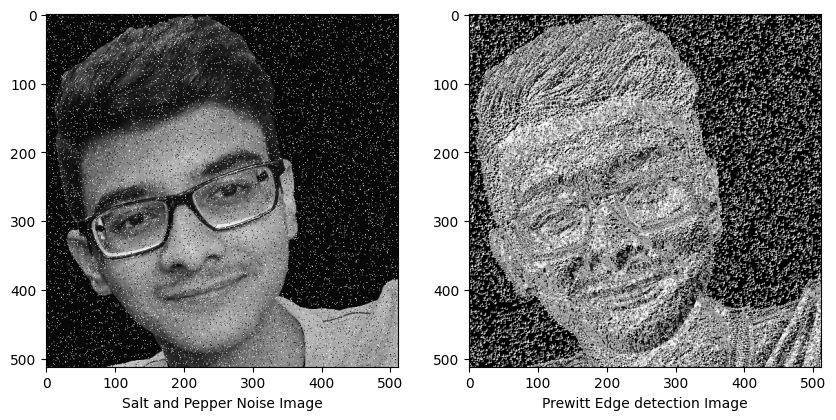

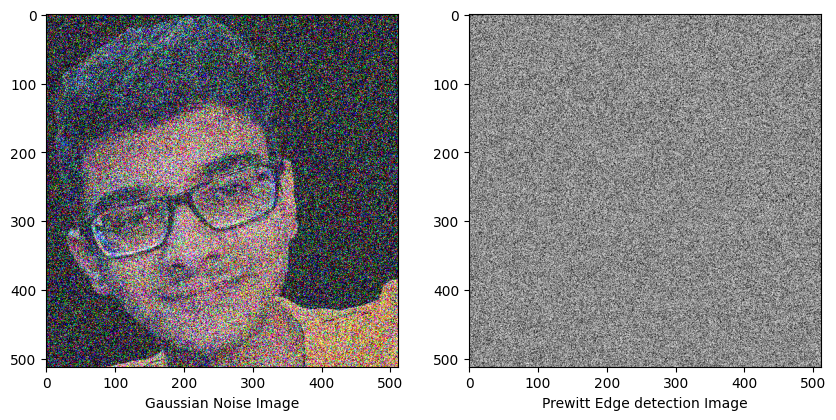

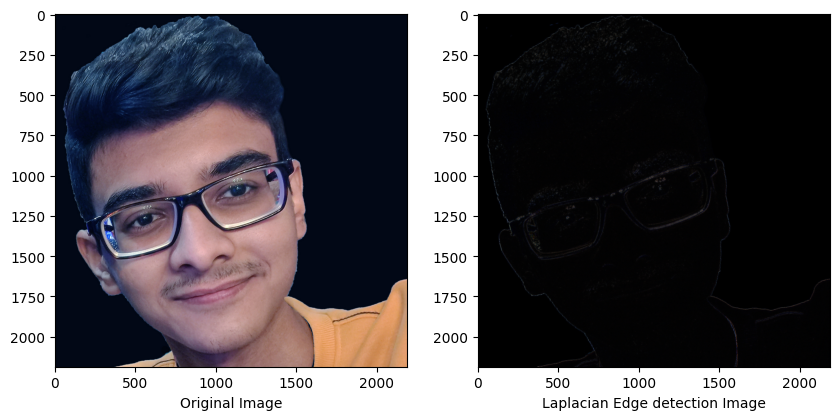

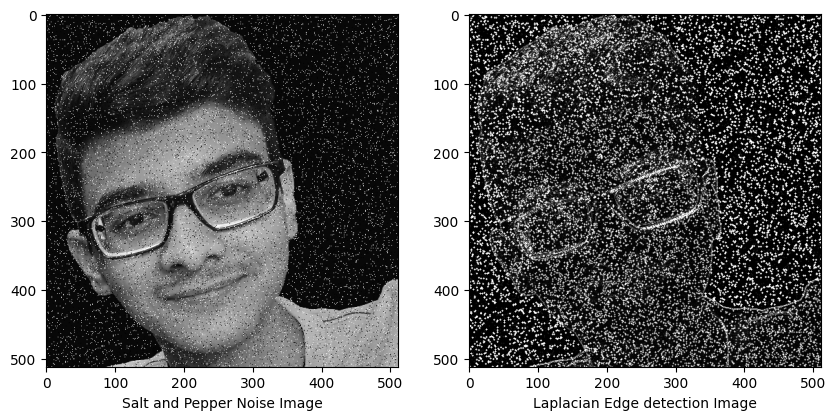

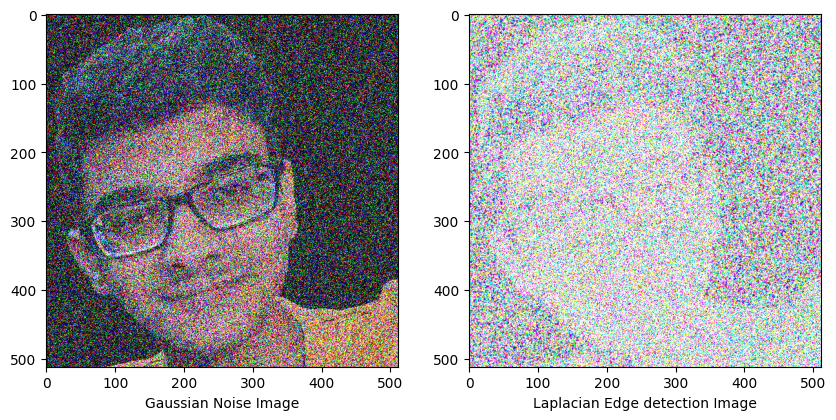

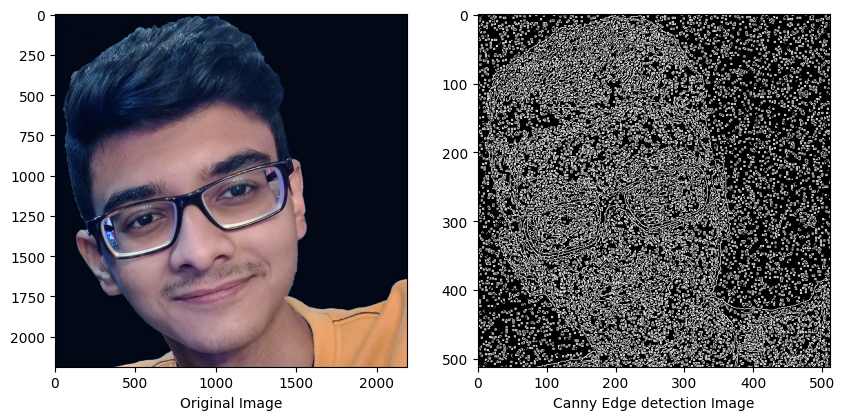

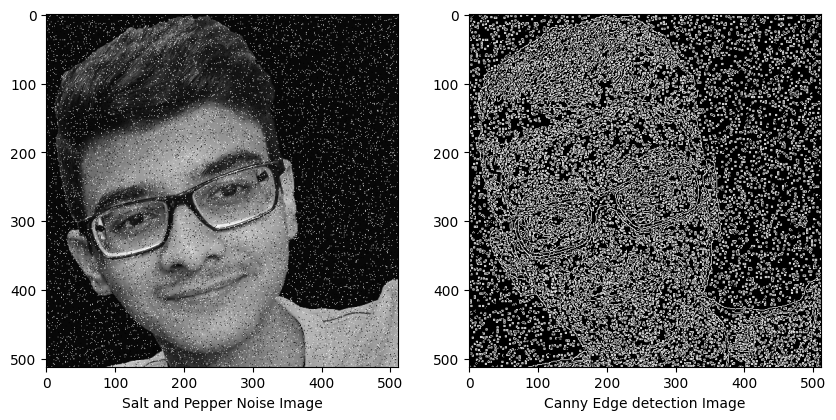

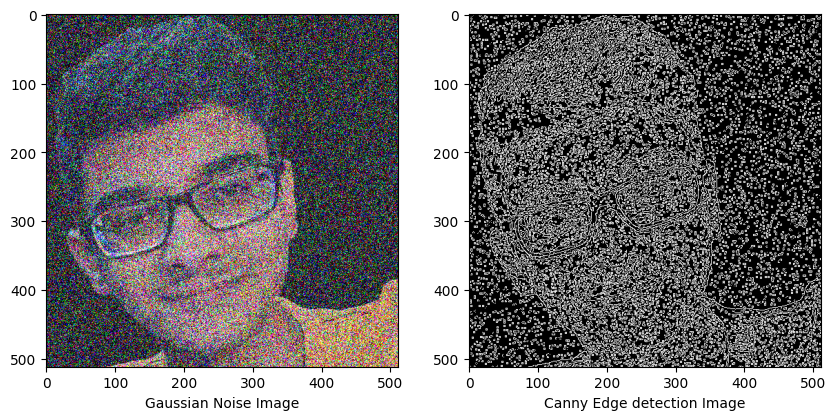

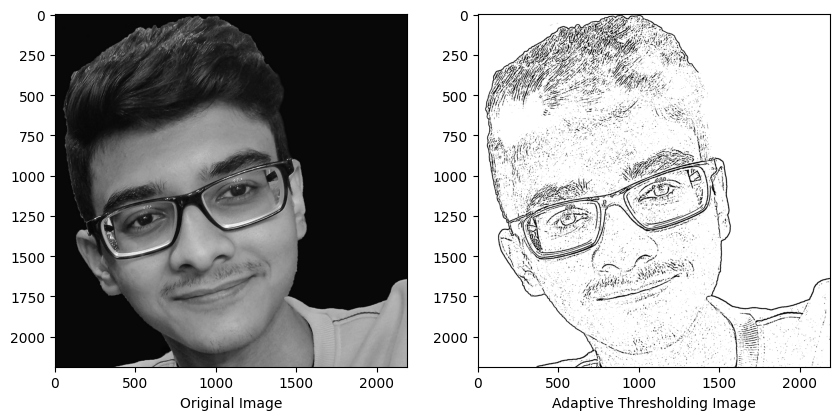

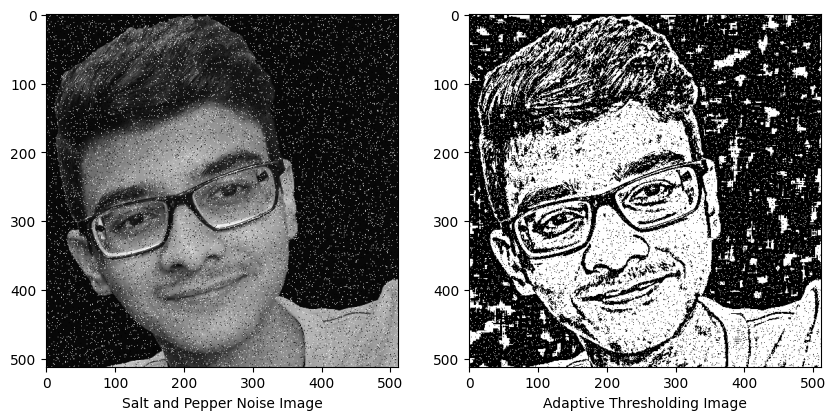

In [9]:
img_col = cv2.imread('./RGB.jpg')
img_gry = cv2.imread('./RGB.jpg', cv2.IMREAD_GRAYSCALE)
img_gry = cv2.resize(img_gry, (512, 512))
img_col = cv2.resize(img_col, (512, 512))
snp_noise_img = snp_noise(img_gry)
gaus_noise_img = gaussian_noise(img_col)

prewitt_edge_detection(cv2.imread('./RGB.jpg'), 'Original Image')
prewitt_edge_detection(snp_noise_img, 'Salt and Pepper Noise Image')
prewitt_edge_detection(gaus_noise_img, 'Gaussian Noise Image')

laplacian_edge_detection(cv2.imread('./RGB.jpg'), 'Original Image')
laplacian_edge_detection(snp_noise_img, 'Salt and Pepper Noise Image')
laplacian_edge_detection(gaus_noise_img, 'Gaussian Noise Image')

canny_edge_detection(cv2.imread('./RGB.jpg'), 'Original Image')
canny_edge_detection(snp_noise_img, 'Salt and Pepper Noise Image')
canny_edge_detection(gaus_noise_img, 'Gaussian Noise Image')

adaptive_thresholding(cv2.imread('./RGB.jpg', cv2.IMREAD_GRAYSCALE), 'Original Image')
adaptive_thresholding(snp_noise_img, 'Salt and Pepper Noise Image')
# adaptive_thresholding(gaus_noise_img, 'Gaussian Noise Image')

